<a href="https://colab.research.google.com/github/MkButterfingers/LoanPrediction/blob/main/Loan_models_mk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sn

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv("Loan_Data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
X = df.iloc[:,:-1]
Y=df.iloc[:, -1]

In [5]:
drop = ['Loan_ID']
X = X.drop(drop,axis = 1 )

In [6]:
Y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [7]:
X.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

In [8]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [9]:
X = pd.get_dummies(X, columns = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area'])

In [10]:
X['Loan_Amount_Term'] = X['Loan_Amount_Term'].fillna(X['Loan_Amount_Term'].mean())
X['LoanAmount'] = X['LoanAmount'].fillna(X['LoanAmount'].mean())
X['Credit_History'] = X['Credit_History'].fillna(X['Credit_History'].mean())

In [11]:
Y.isnull().sum()

0

Number of Benign:  422
Number of Malignant :  192


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


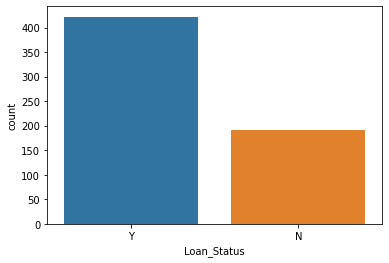

In [12]:
ax = sn.countplot(Y,label="Count")      
y,n =Y.value_counts()
print('Number of Benign: ',y)
print('Number of Malignant : ',n)

In [13]:
X.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199,0.182410,0.796417,0.346906,0.648208,0.561889,0.166124,0.164495,0.083062,0.781759,0.218241,0.814332,0.133550,0.291531,0.379479,0.328990
std,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.386497,0.402991,0.476373,0.477919,0.496559,0.372495,0.371027,0.276201,0.413389,0.413389,0.389155,0.340446,0.454838,0.485653,0.470229
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


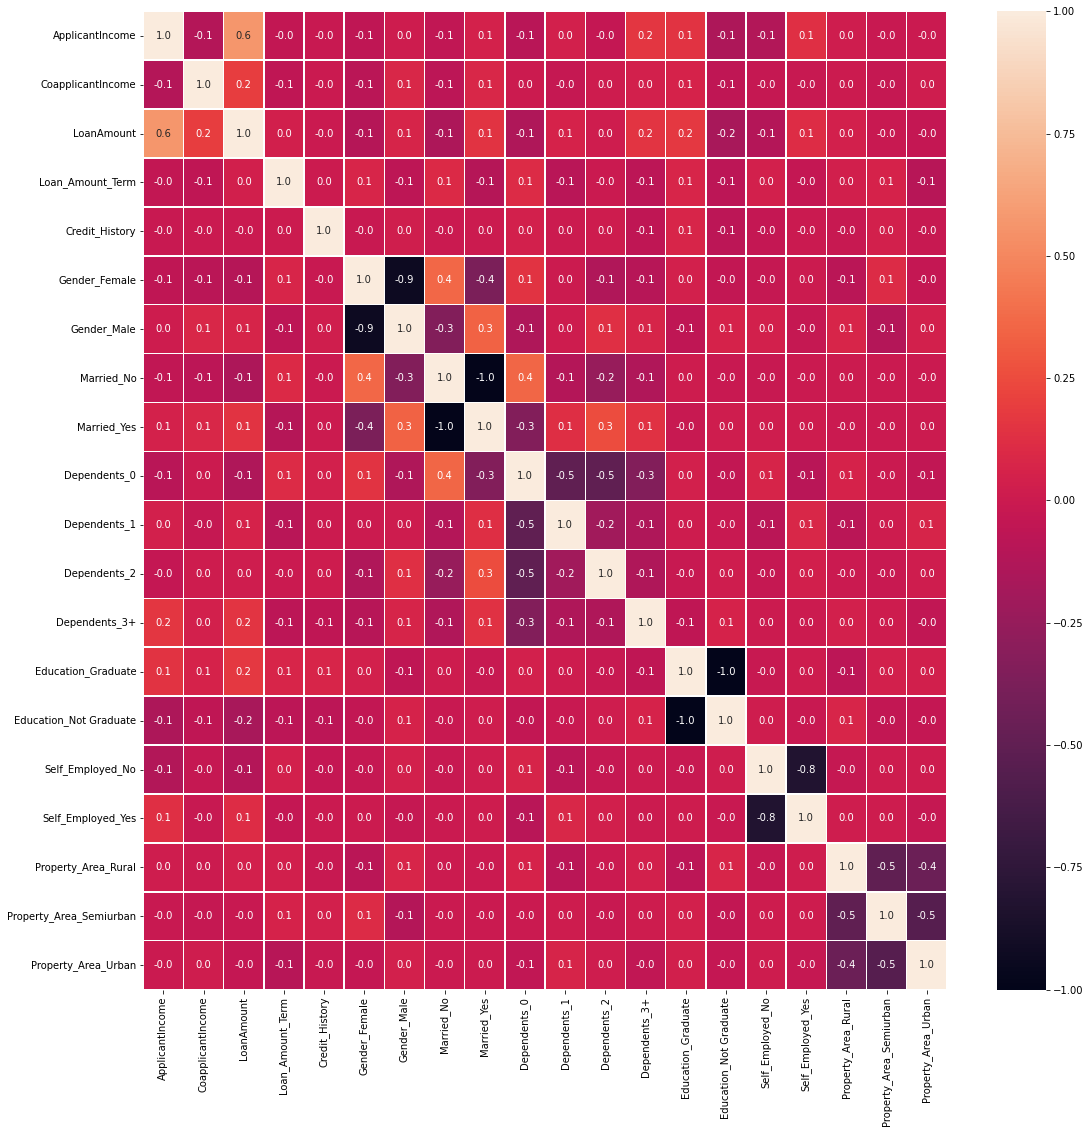

In [14]:
f,ax = plt.subplots(figsize=(18, 18))
sn.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [15]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [16]:
test

,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,491,5333,1131.0,186.0,360.0,0.842199,0,1,0,1,...,0,0,0,1,1,0,0,0,1,Y
1,492,3691,0.0,110.0,360.0,1.000000,0,1,1,0,...,0,0,0,1,1,0,1,0,0,Y
2,493,17263,0.0,225.0,360.0,1.000000,1,0,1,0,...,0,0,0,1,0,1,0,1,0,Y
3,494,3597,2157.0,119.0,360.0,0.000000,0,1,0,1,...,0,0,1,0,1,0,1,0,0,N
4,495,3326,913.0,105.0,84.0,1.000000,1,0,0,1,...,0,0,1,0,1,0,0,1,0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,609,2900,0.0,71.0,360.0,1.000000,1,0,1,0,...,0,0,1,0,1,0,1,0,0,Y
119,610,4106,0.0,40.0,180.0,1.000000,0,1,0,1,...,0,1,1,0,1,0,1,0,0,Y
120,611,8072,240.0,253.0,360.0,1.000000,0,1,0,1,...,0,0,1,0,1,0,0,0,1,Y
121,612,7583,0.0,187.0,360.0,1.000000,0,1,0,1,...,1,0,1,0,1,0,0,0,1,Y


In [17]:
x_train = train.drop(["Loan_Status"],axis = 1)
y_train = train['Loan_Status']
x_test = test.drop("Loan_Status", axis = 1)
y_test = test['Loan_Status']

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder() 
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

Funciton to get the score

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics

Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Train 1: Decision Tree

In [20]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train, y_train)
y_pred1 = regressor.predict(x_test)


classification_decision = (classification_report(y_test, y_pred1))
print(classification_decision)

              precision    recall  f1-score   support

           0       0.38      0.85      0.52        39
           1       0.83      0.36      0.50        84

    accuracy                           0.51       123
   macro avg       0.61      0.60      0.51       123
weighted avg       0.69      0.51      0.51       123



Applying gridsearch for Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
alg = ['entropy', 'gini']
values_grid = {'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}
model = DecisionTreeClassifier()
gridDecisionTree = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)
gridDecisionTree.fit(x_train, y_train)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Algorithm:  entropy
Score:  0.7054009482580911


Train 2: Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)
y_pred2 = classifier.predict(x_test)


classification_logistic = (classification_report(y_test, y_pred2))
print(classification_logistic)

              precision    recall  f1-score   support

           0       0.90      0.49      0.63        39
           1       0.80      0.98      0.88        84

    accuracy                           0.82       123
   macro avg       0.85      0.73      0.76       123
weighted avg       0.84      0.82      0.80       123



Applying gridsearch for Logistic Regression

In [23]:
from sklearn.metrics import f1_score
grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}
classifier.predict_proba(x_train)[:,1]
final_prediction=np.where(classifier.predict_proba(x_train)[:,1]>=0.5,1,0)
f1_score(y_train, final_prediction)

0.8723404255319148

Train 3: K Means

In [24]:
from sklearn.cluster import KMeans
kmodel = KMeans(random_state = 9,n_clusters = 2)
kmodel.fit(x_train)
y_pred3 = kmodel.predict(x_test)

classification_kmean = (classification_report(y_test, y_pred3))
print(classification_kmean)

              precision    recall  f1-score   support

           0       0.36      0.38      0.37        39
           1       0.70      0.68      0.69        84

    accuracy                           0.59       123
   macro avg       0.53      0.53      0.53       123
weighted avg       0.59      0.59      0.59       123



Train 4: Forrest

In [25]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(x_train,y_train)
y_pred4 = random_forest.predict(x_test)

classification_forest = (classification_report(y_test, y_pred4))
print(classification_forest)

              precision    recall  f1-score   support

           0       0.60      0.54      0.57        39
           1       0.80      0.83      0.81        84

    accuracy                           0.74       123
   macro avg       0.70      0.69      0.69       123
weighted avg       0.73      0.74      0.74       123



Applying gridsearch for Forrest

In [27]:
n_estimators = np.array([100])
alg = ['entropy', 'gini']
values_grid = {'n_estimators': n_estimators, 'criterion': alg}
model = RandomForestClassifier()
gridForrest = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)
gridForrest.fit(x_train, y_train)
print('Algorithm: ', gridForrest.best_estimator_.criterion)
print('Score: ', gridForrest.best_score_)

Algorithm:  entropy
Score:  0.7700061842918986


Train 5: SVM

In [28]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(x_train,y_train)
y_pred5 = svm_model.predict(x_test)

classification_svm = (classification_report(y_test, y_pred5))
print(classification_svm)

              precision    recall  f1-score   support

           0       0.89      0.44      0.59        39
           1       0.79      0.98      0.87        84

    accuracy                           0.80       123
   macro avg       0.84      0.71      0.73       123
weighted avg       0.82      0.80      0.78       123



Applying gridsearch for SVM

In [29]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True)
grid.fit(x_train, y_train)
#print(grid.best_params_) 
#print(grid.best_estimator_)
grid_predictions = grid.predict(x_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.95      0.46      0.62        39
           1       0.80      0.99      0.88        84

    accuracy                           0.82       123
   macro avg       0.87      0.72      0.75       123
weighted avg       0.85      0.82      0.80       123



Train 6 : Naive-Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()
naive_model.fit(x_train, y_train)
y_pred6 = naive_model.predict(x_test)  

classification_naive = (classification_report(y_test, y_pred6))
print(classification_naive)

              precision    recall  f1-score   support

           0       0.73      0.56      0.64        39
           1       0.82      0.90      0.86        84

    accuracy                           0.80       123
   macro avg       0.78      0.73      0.75       123
weighted avg       0.79      0.80      0.79       123

